<a href="https://colab.research.google.com/github/PrimePy/DataScience/blob/master/Deep%20Learning/Deep%20Learning%20with%20pytorch/PyTorch%20for%20Deep%20Learning%20and%20Computer%20Vision/Intro%20to%20Tensors%20-%20PyTorch/3.Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch as torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn as nn

In [0]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
# Random always generate same type of data
x, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(x)
y_data = torch.Tensor(y)

In [0]:
def scatter_plot():
  plt.scatter(x[y==0, 0], x[y==0, 1])
  plt.scatter(x[y==1, 0], x[y==1, 1])

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [47]:
torch.manual_seed(2)
model = Model(2, 1)
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
 tensor([0.1939], requires_grad=True)]

In [48]:
[w,b] = model.parameters()
print(w,b)

Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True) Parameter containing:
tensor([0.1939], requires_grad=True)


In [0]:
w1, w2 = w.view(2)

def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [50]:
get_params()

(0.16220331192016602, -0.1682732105255127, 0.19390898942947388)

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1 * x1 + b1)/ -w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

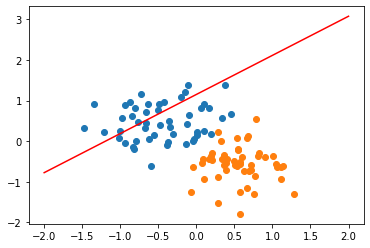

In [52]:
plot_fit('Perceptrons')

In [0]:
criterion = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [54]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print('Epoch: ',i, 'Loss: ', loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch:  0 Loss:  0.6185115575790405
Epoch:  1 Loss:  0.6174639463424683
Epoch:  2 Loss:  0.6164201498031616
Epoch:  3 Loss:  0.6153794527053833
Epoch:  4 Loss:  0.614342451095581
Epoch:  5 Loss:  0.6133086681365967
Epoch:  6 Loss:  0.6122783422470093
Epoch:  7 Loss:  0.6112515330314636
Epoch:  8 Loss:  0.6102280616760254
Epoch:  9 Loss:  0.6092080473899841
Epoch:  10 Loss:  0.6081910729408264
Epoch:  11 Loss:  0.6071775555610657
Epoch:  12 Loss:  0.606167733669281
Epoch:  13 Loss:  0.6051608920097351
Epoch:  14 Loss:  0.604157567024231
Epoch:  15 Loss:  0.6031574606895447
Epoch:  16 Loss:  0.602160632610321
Epoch:  17 Loss:  0.6011670827865601
Epoch:  18 Loss:  0.6001767516136169
Epoch:  19 Loss:  0.599189817905426
Epoch:  20 Loss:  0.5982059240341187
Epoch:  21 Loss:  0.5972254276275635
Epoch:  22 Loss:  0.5962479114532471
Epoch:  23 Loss:  0.5952739119529724
Epoch:  24 Loss:  0.5943028926849365
Epoch:  25 Loss:  0.5933352112770081
Epoch:  26 Loss:  0.5923705101013184
Epoch:  27 Loss:

Text(0, 0.5, 'Loss')

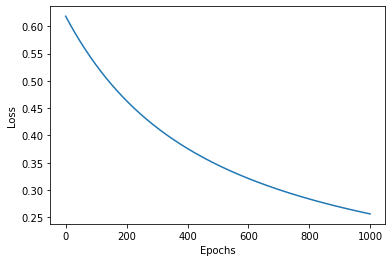

In [55]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

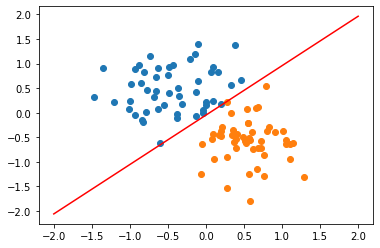

In [56]:
plot_fit('Trained Model')

In [57]:
get_params()

(1.4355945587158203, -1.4284124374389648, -0.06880918145179749)

Red point positive probablity = 0.9424158334732056
Blue point positive probablity = 0.05055497586727142
Red point positive probablity = 1
Blue point positive probablity = 0


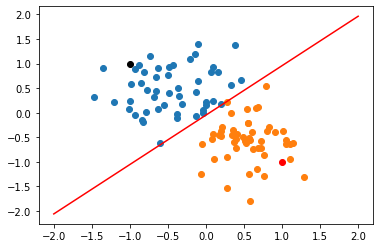

In [59]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print('Red point positive probablity = {}'.format(model.forward(point1).item()))
print('Blue point positive probablity = {}'.format(model.forward(point2).item()))
print('Red point positive probablity = {}'.format(model.predict(point1)))
print('Blue point positive probablity = {}'.format(model.predict(point2)))
plot_fit('Tested Model')